In [356]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


## Data Importing

In [357]:
df=pd.read_excel("D:/Dataset/Copy of loan.xlsx")

In [358]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [359]:
df.isnull().sum()
# checking for null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [360]:
df.duplicated().sum()
#checking if it has duplicated rows

0

In [361]:
df.nunique()
#checking for unique values

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [362]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Data Cleaning

In [363]:
df.drop(["Loan_ID"],axis=1,inplace=True)
#since Loan ID does not have any significance on  the output we delete the column.

In [364]:
#since there are 3+ in Dependents column we need to convert to 3
df["Dependents"].replace('3+','3',inplace=True)

In [365]:
df["Dependents"].nunique()
# confirming whether 3+ is replaced or not.

4

In [366]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [367]:
# replacing null values.
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [368]:
df.isnull().sum()
#checking if the null value are replaced or not.

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [369]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [370]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [371]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Data Preprocessing

In [372]:
df["Dependents"] = df["Dependents"].astype("int64")
df["CoapplicantIncome"] = df["CoapplicantIncome"].astype("int64")
df["Credit_History"] = df["Credit_History"].astype("int64")

In [373]:
df["Loan_Status"] = df["Loan_Status"].replace("Y",1)
df["Loan_Status"] = df["Loan_Status"].replace("N",0)

In [374]:
df.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
Loan_Status            int64
dtype: object

In [375]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,146.412162,360.0,1,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1,Urban,1
4,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0,71.000000,360.0,1,Rural,1
610,Male,Yes,3,Graduate,No,4106,0,40.000000,180.0,1,Rural,1
611,Male,Yes,1,Graduate,No,8072,240,253.000000,360.0,1,Urban,1
612,Male,Yes,2,Graduate,No,7583,0,187.000000,360.0,1,Urban,1


In [376]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [377]:
cat_df = df.select_dtypes(include='object')

In [378]:
cat_df

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,No,Graduate,No,Urban
1,Male,Yes,Graduate,No,Rural
2,Male,Yes,Graduate,Yes,Urban
3,Male,Yes,Not Graduate,No,Urban
4,Male,No,Graduate,No,Urban
...,...,...,...,...,...
609,Female,No,Graduate,No,Rural
610,Male,Yes,Graduate,No,Rural
611,Male,Yes,Graduate,No,Urban
612,Male,Yes,Graduate,No,Urban


In [379]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [380]:
# Fit and transform the categorical columns
onehot_encoded = ohe.fit_transform(cat_df)

# Convert the result to a DataFrame
onehot_df = pd.DataFrame(onehot_encoded.toarray(), columns=ohe.get_feature_names_out(cat_df.columns))

onehot_df

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [381]:
num_df = df.select_dtypes(include=['int64','float64'])

In [382]:
num_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,5849,0,146.412162,360.0,1,1
1,1,4583,1508,128.000000,360.0,1,0
2,0,3000,0,66.000000,360.0,1,1
3,0,2583,2358,120.000000,360.0,1,1
4,0,6000,0,141.000000,360.0,1,1
...,...,...,...,...,...,...,...
609,0,2900,0,71.000000,360.0,1,1
610,3,4106,0,40.000000,180.0,1,1
611,1,8072,240,253.000000,360.0,1,1
612,2,7583,0,187.000000,360.0,1,1


In [383]:
num_df["Totalincome"]=num_df["ApplicantIncome"]+num_df["CoapplicantIncome"]

In [384]:
num_df.drop(["ApplicantIncome","CoapplicantIncome"],inplace=True,axis=1)

In [385]:
num_df

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Totalincome
0,0,146.412162,360.0,1,1,5849
1,1,128.000000,360.0,1,0,6091
2,0,66.000000,360.0,1,1,3000
3,0,120.000000,360.0,1,1,4941
4,0,141.000000,360.0,1,1,6000
...,...,...,...,...,...,...
609,0,71.000000,360.0,1,1,2900
610,3,40.000000,180.0,1,1,4106
611,1,253.000000,360.0,1,1,8312
612,2,187.000000,360.0,1,1,7583


### Total_income column preprocessing

<AxesSubplot: xlabel='Totalincome', ylabel='Count'>

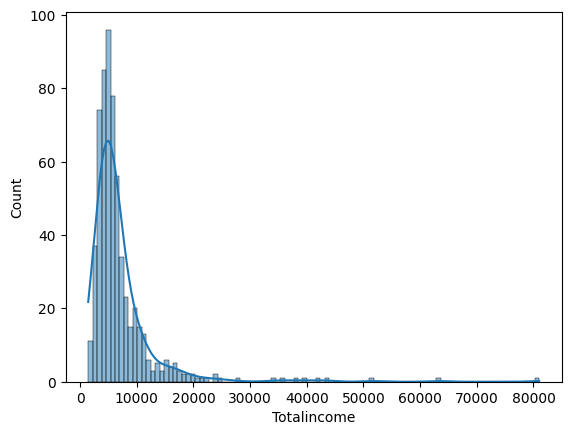

In [259]:
sns.histplot(num_df["Totalincome"],kde=True)

In [260]:
num_df["Totalincome"]=np.log(num_df["Totalincome"])

<AxesSubplot: xlabel='Totalincome', ylabel='Count'>

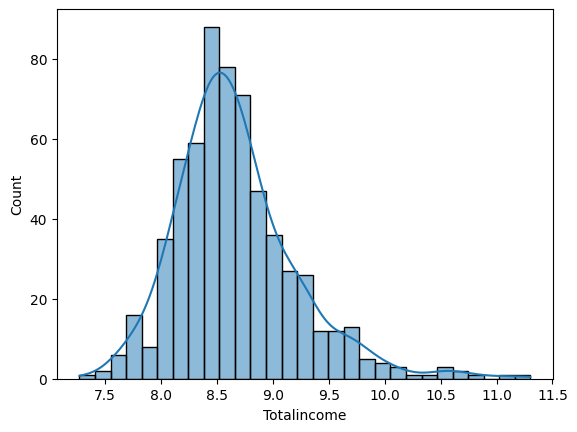

In [261]:
sns.histplot(num_df["Totalincome"],kde=True)

<AxesSubplot: >

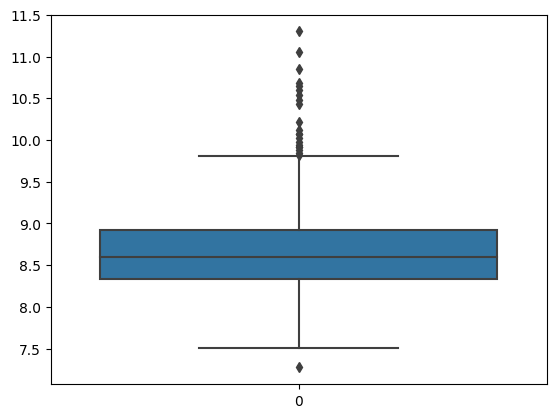

In [262]:
sns.boxplot(num_df["Totalincome"])

### Loan Amount  column preprocessing


<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

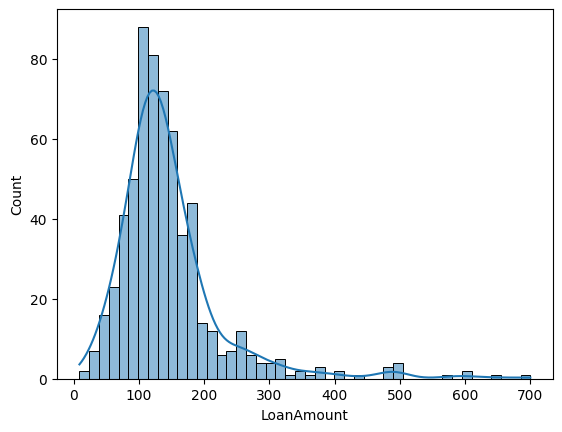

In [265]:
sns.histplot(num_df["LoanAmount"],kde=True)

In [266]:
num_df["LoanAmount"]=np.log(num_df["LoanAmount"])

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

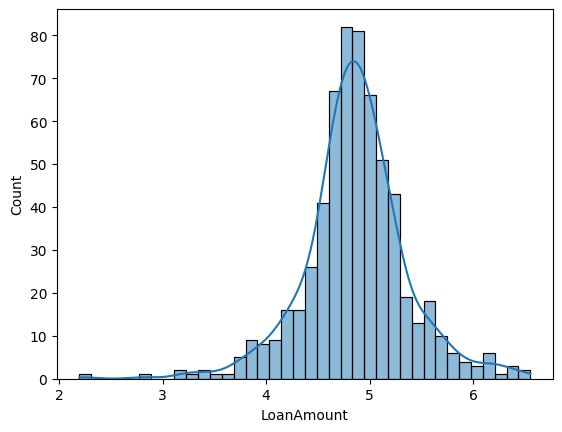

In [267]:
sns.histplot(num_df["LoanAmount"],kde=True)

In [271]:
num_df

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Totalincome
0,0,4.986426,360.0,1,1,8.674026
1,1,4.852030,360.0,1,0,8.714568
2,0,4.189655,360.0,1,1,8.006368
3,0,4.787492,360.0,1,1,8.505323
4,0,4.948760,360.0,1,1,8.699515
...,...,...,...,...,...,...
609,0,4.262680,360.0,1,1,7.972466
610,3,3.688879,180.0,1,1,8.320205
611,1,5.533389,360.0,1,1,9.025456
612,2,5.231109,360.0,1,1,8.933664


In [273]:
cat_df=onehot_df

In [274]:
cat_df

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [277]:
final_df=pd.concat([cat_df,num_df],axis=1)

In [279]:
final_df

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Totalincome
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,4.986426,360.0,1,1,8.674026
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,4.852030,360.0,1,0,8.714568
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,4.189655,360.0,1,1,8.006368
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,4.787492,360.0,1,1,8.505323
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,4.948760,360.0,1,1,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,4.262680,360.0,1,1,7.972466
610,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3,3.688879,180.0,1,1,8.320205
611,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,5.533389,360.0,1,1,9.025456
612,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2,5.231109,360.0,1,1,8.933664


In [285]:
X=final_df.iloc[:,np.r_[0:15,16:17]]

In [286]:
X

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Totalincome
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,4.986426,360.0,1,8.674026
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,4.852030,360.0,1,8.714568
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,4.189655,360.0,1,8.006368
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,4.787492,360.0,1,8.505323
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,4.948760,360.0,1,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,4.262680,360.0,1,7.972466
610,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3,3.688879,180.0,1,8.320205
611,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,5.533389,360.0,1,9.025456
612,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2,5.231109,360.0,1,8.933664


In [287]:
y=final_df["Loan_Status"]

In [288]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [332]:
from sklearn.linear_model import LogisticRegression

In [333]:
lr=LogisticRegression()

In [334]:
lr.fit(X_train,y_train)

C:\Users\yenit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [335]:
lr.score(X_train,y_train)

0.814663951120163

In [336]:
y_pred=lr.predict(X_test)

In [337]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [338]:
from sklearn.metrics import accuracy_score

In [339]:
accuracy_score(y_pred,y_test)

0.7886178861788617

In [342]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred6 = best_logreg_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred6)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Test Set: 0.7886178861788617


## Random Forest

In [304]:
from sklearn.ensemble import RandomForestClassifier

In [305]:
rfc=RandomForestClassifier()

In [306]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [307]:
rfc.score(X_train,y_train)

1.0

In [310]:
y_pred2=rfc.predict(X_test)

In [311]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [312]:
accuracy_score(y_pred2,y_test)

0.7642276422764228

In [317]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None,5, 10, 20, 30],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred3 = best_rf_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
Accuracy on Test Set: 0.7642276422764228


# XG-Boost

In [318]:
from xgboost import XGBClassifier


In [319]:
xgb=XGBClassifier()

In [320]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [326]:
y_pred4=xgb.predict(X_test)

In [327]:
y_pred4

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [328]:
accuracy_score(y_pred4,y_test)

0.7642276422764228

In [331]:
# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.005,0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200,300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred5 = best_xgb_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 1.0}
Accuracy on Test Set: 0.7886178861788617


## Naive Bayes

In [386]:
from sklearn.naive_bayes import GaussianNB

In [387]:
nb=GaussianNB()

In [388]:
nb.fit(X_train,y_train)

GaussianNB()

In [389]:
nb.score(X_train,y_train)

0.814663951120163

In [391]:
y_pred7=nb.predict(X_test)

In [393]:
y_pred7

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [392]:
accuracy_score(y_pred7,y_test)

0.7804878048780488

## GB Classifier

In [394]:
from sklearn.ensemble import GradientBoostingClassifier

In [396]:
gb=GradientBoostingClassifier()

In [397]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [399]:
y_pred8=gb.predict(X_test)

In [400]:
y_pred8

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [401]:
accuracy_score(y_pred8,y_test)

0.7804878048780488

In [402]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred9 = best_gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred9)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set: 0.7804878048780488


## Since the accuracy part is only considered for this problem statement we are not going with precision, recall, f1_score. Here Logistic Regression gives the best accuracy hence the Logistic Regression model is serilized.

In [403]:
# serilizing the model and saving it.
from joblib import dump, load
dump(lr, 'filename.joblib')

['filename.joblib']

In [406]:
#Loading the saved model to predict the loan Eligibility
load('filename.joblib')

LogisticRegression()

## Thank You